<a href="https://www.kaggle.com/code/ayushikashyap/house-pricing-detailed-eda-and-modelling?scriptVersionId=252040422" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# House Pricing

This submission provides a thorough explanation of the approach and insights, accompanied by a comprehensive exploratory data analysis (EDA). The analysis uncovers key patterns and relationships in the data, supporting the modeling process and enhancing interpretability. The goal is to offer clear understanding and transparency throughout the data journey.

## Import Libraries and read the files from directory

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import warnings

%matplotlib inline
sns.set()

warnings.filterwarnings('ignore', category=FutureWarning)

warnings.filterwarnings('ignore', category=UserWarning)

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


## Read data from CSV Files

In [2]:
train = pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv")
test = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv")

## EDA on Datasets

Training Data - The dataset which will be used to train the model. The set of columns can be divided into:

Target Variabe - The column we are trying to predict (SalePrice).

Features - The rest of the columns from the dataset.

Let's look into the dataset and it's column information.

In [3]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We can also have a look at the test data, which is the dataset on which the prediction will be made. 

Note that this dataset does not have the target variable, SalePrice, which is to be predicted.

In [5]:
test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### Summary Statistics

We can see the differnece between the total number of rows in the datasets and the number of non-null values in few of the columns. As an example, the total number of rows in the train dataset is 1460 and the number of non-null value in it's column 'Alley' is only 91, indicating the presence of non-null or missing values.

Let's look more into the summary statistics of the numerical columns using .describe(), which gives below information for each column.

- count - The number of not-empty values.
- mean - The average (mean) value.
- std - The standard deviation.
- min - the minimum value.
- 25% - The 25% percentile*.
- 50% - The 50% percentile*.
- 75% - The 75% percentile*.
- max - the maximum value.

In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## EDA on Target Variable - SalePrice

A seaborn plot to understand the distribution of target variable - SalePrice.

**Key Observations**

- Right Skewed Distribution: Most of the houses are priced between $100,000 and $250,000, with the peak around $150,000 – $180,000.
- Presence of Outliers: The tail on the right indicates the presence of high-end or luxury properties. These are potential outliers that may affect regression models.
- Not Normally Distributed: Since it is skewed, a linear model like linear regression may not perform well unless the data is transformed.

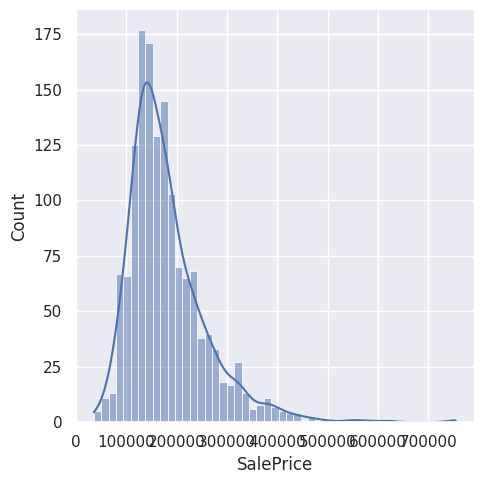

In [8]:
sns.displot(train['SalePrice'], kde = True)

Since the distribution is not normal. We can normalize using **Log Transformations**, this will reduce the skewness and make the data more symmetrical.

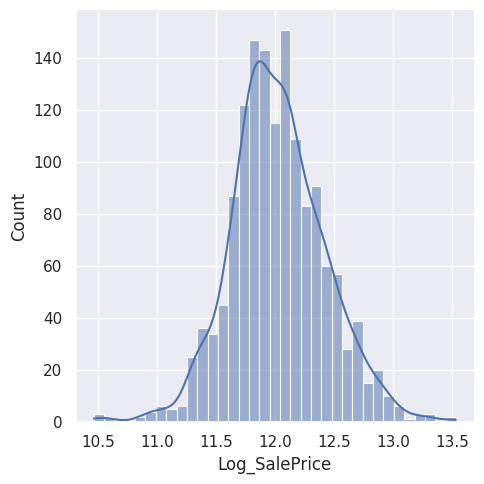

In [9]:
train['Log_SalePrice'] = np.log(train['SalePrice'])
sns.displot(train['Log_SalePrice'], kde = True)

## EDA on Features

### Numerical Column Distribution

In [10]:
numerical_cols = train.select_dtypes(include=['float64','int64']).columns

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

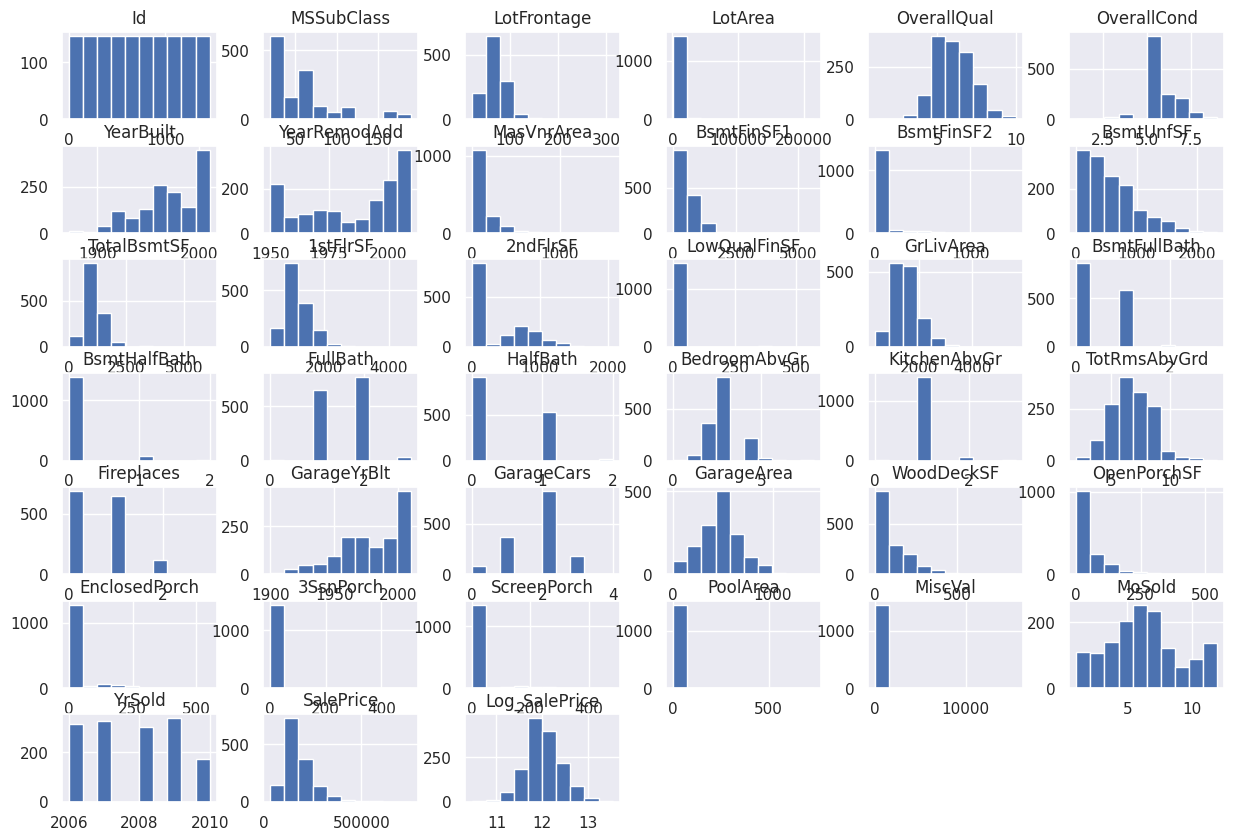

In [11]:
train[numerical_cols].hist(figsize=(15,10))

### Countplots for Categorical

<Axes: xlabel='MSZoning', ylabel='count'>

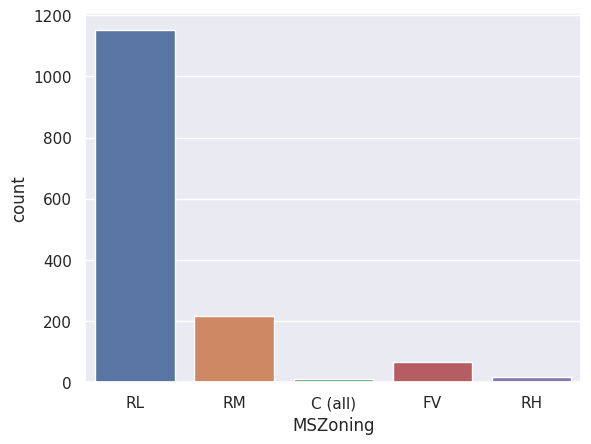

In [12]:
sns.countplot(data=train, x='MSZoning')

### Bivariant Analysis - Target vs Feature

<Axes: xlabel='MSZoning', ylabel='SalePrice'>

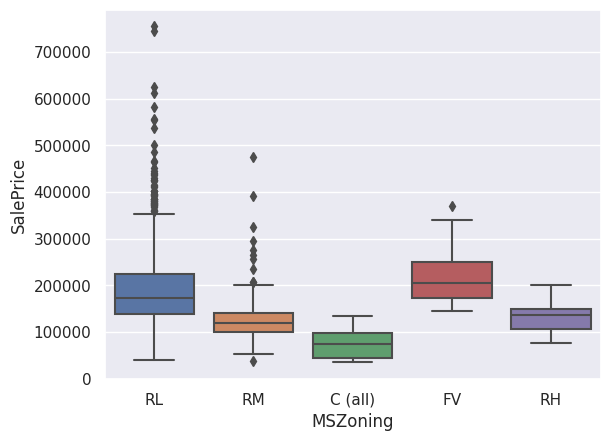

In [13]:
sns.boxplot(x='MSZoning', y='SalePrice', data = train)

**RL (Residential Low Density)**

The **RL** zoning category represents residential low-density areas, and it shows the **highest median sale price** among all zoning types. The interquartile range (middle 50% of sale prices) is wide, indicating a large variation in property values within this zone. There are also many outliers above the upper whisker, suggesting the presence of **very high-priced properties** — likely larger homes on spacious lots. This zone appears to be the most common and includes many desirable or premium homes.

**RM (Residential Medium Density)**

In the **RM** zone, the median sale price is notably lower than RL, with a tighter interquartile range. The data suggests that homes in this zone tend to be **more affordable** and possibly smaller or more densely packed. However, there are several outliers with high prices, indicating that some **exceptional properties** exist in this zone as well. This zoning likely serves mid-range housing, possibly including duplexes or smaller homes.

**C (all) – Commercial**

The **C (all)** zone corresponds to commercial areas and shows the **lowest median sale prices** overall. The range of values is narrow, and most properties are priced lower than those in residential zones. This indicates that **residential properties located in commercial zones** may be older, less desirable, or limited in number. These might be converted units or edge cases, which explains the lower pricing and more compact distribution.

**FV (Floating Village Residential)**

Properties in the **FV** zone have a **high median sale price**, second only to RL, with a moderately wide interquartile range. This suggests that FV homes are relatively expensive and may offer **unique or upscale living environments**, such as lakeside or community-planned developments. The presence of a few high-value outliers further supports the notion that this zone contains **premium or custom-built homes**.

**RH (Residential High Density)**

The **RH** zone shows a lower median price compared to RL and FV but slightly higher than C (all). The distribution is tighter, indicating less variation in sale prices. These properties are likely **compact, higher-density housing units** such as townhouses or apartments. The limited price range suggests a more **uniform housing stock** in this zone, perhaps aimed at affordable urban living.

**Other**

The **Other** category includes properties that fall outside the main zoning types. The data here is minimal — as shown by the very narrow box and lack of visible whiskers — implying **few data points** or very little variation. Properties in this category might be special-use or rarely zoned areas, and their sale prices seem to hover around the median with no notable outliers or variability.

### Duplicate Rows 
Lets check if there are any duplicate rows in the training dataset, using .duplicated(), which returns a boolean series denoting duplicate rows.

An empty dataframe returned for duplicate rows indicates there are no duplicate rows in the training dataset.

In [14]:
duplicates = train[train.duplicated()]
print("Duplicate Rows: \n", duplicates)

Duplicate Rows: 
 Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice, Log_SalePrice]
Index

### Missing Values

The below function will identify:

- Zeroes: The number of zeroes in a column.
- NaNs: The number of NaNs in a column.
- None: The number of 'None' appearing as a string a column.
- Percentage: The percentage of missing values for each column.
- Data Type: The datatype of each column for reference.

**Ref:** https://www.kaggle.com/code/amrmohamed319/housing-price-with-ames-data-new-insights-top-1


In [15]:
def miss_data(data):
    miss_df = ((data == 0).sum().to_frame())
    miss_df = miss_df.rename(columns = {0:'Zeroes'})
    miss_df.index.name = 'Features'
    miss_df['NaN'] = (data.isnull()).sum()
    miss_df['None'] = (data == None).sum()
    miss_df['Total'] = miss_df['Zeroes'] + miss_df['NaN'] + miss_df['None']
    miss_df['Percent'] = 100 * miss_df['Total'] / len(data)
    miss_df['Type'] = [data[i].dtype for i in miss_df.index]
    return miss_df.sort_values(ascending = False, by = 'Percent')

In [16]:
miss_df = miss_data(data = train)
miss_df

,Zeroes,NaN,None,Total,Percent,Type
Features,,,,,,
PoolArea,1453,0,0,1453,99.520548,int64
PoolQC,0,1453,0,1453,99.520548,object
3SsnPorch,1436,0,0,1436,98.356164,int64
LowQualFinSF,1434,0,0,1434,98.219178,int64
MiscVal,1408,0,0,1408,96.438356,int64
...,...,...,...,...,...,...
Foundation,0,0,0,0,0.000000,object
Heating,0,0,0,0,0.000000,object
HeatingQC,0,0,0,0,0.000000,object


The data frame with missing value counts indicates that:

- **Some features are nearly always missing**
PoolQC, PoolArea, 3SsnPorch, LowQualFinSF, MiscVal, etc. have over 90% missing or zero values. These columns are probably not useful for modeling because: They provide almost no information (very few non-missing values).
- **Zero and NaN**
Some features like PoolArea, MiscVal, LowQualFinSF have a lot of zeros, not NaNs. In these cases, zero might be a valid value, not missing
- **Important features with moderate missing values**
Features like: FireplaceQu (48% missing), Garage* fields (5%), Bsmt fields (~2–5%), LotFrontage (17%)
- **Some features use "None" (string) instead of NaN**
Like MasVnrType which has 3,412 "None" entries. These values don’t get picked up by .isnull(), so this function is useful to catch them.
- **Many features are clean**
A large number of features (bottom part of the list) have 0% missing values. Examples: GrLivArea, SaleCondition, YearBuilt, etc.


## Data Cleaning / Preparation

### Based on the previous analysis on the columns, we can carry below steps for data preparation.

- **Drop**:	Features with highly missing values(PoolQC, PoolArea, 3SsnPorch, etc.) can be dropped.
- **Impute**:	Important features with moderate missingness (GarageYrBlt, FireplaceQu, LotFrontage, BsmtQual, etc.) can be imputed.
- **Interpret Zeros Carefully**:	Many fields (like PoolArea) use 0 as valid input, not missing.
- **Handle 'None' Strings**: Replace "None" with np.nan or encode as a category.
Model Confidently with Clean Features	Use clean features like GrLivArea, TotRmsAbvGrd, SaleCondition, etc.

### Impute data for moderately missing values

**Numerical Columns:** Fill missing values with median of each numerical column. Median are robust to outliers and safer than mean.

**Categorical Columns:** Replacing the 'nan' and 'None' values with 'Unknown'

In [17]:
numerical_columns_train = train.select_dtypes(include=['float64','int64']).columns
numerical_columns_test = test.select_dtypes(include=['float64','int64']).columns
train[numerical_columns_train] = train[numerical_columns_train].fillna(train[numerical_columns_train].median())
test[numerical_columns_test] = test[numerical_columns_test].fillna(test[numerical_columns_test].median())

In [18]:
category_columns = train.select_dtypes(include=['object']).columns
train[category_columns] = train[category_columns].fillna("Unknown")
train.replace("None","Unknown", inplace = True)
test[category_columns] = test[category_columns].fillna("Unknown")
test.replace("None","Unknown", inplace = True)

## Feature Engineering

- Porch: Combines all porch types into one total area.
- Bathroom: Combines above-ground and basement bathrooms into one useful metric.
- Basement: Calculates total finished basement area by subtracting unfinished part.
- Total Square Footage: Adds total finished square footage while removing low quality area.

Ref: https://www.kaggle.com/code/amrmohamed319/housing-price-with-ames-data-new-insights-top-1/notebook

In [19]:
# Combine all porch types into a single 'Porch' feature
train['Porch'] = (
    train['OpenPorchSF'] +
    train['EnclosedPorch'] +
    train['3SsnPorch'] +
    train['ScreenPorch']
)

test['Porch'] = (
    test['OpenPorchSF'] +
    test['EnclosedPorch'] +
    test['3SsnPorch'] +
    test['ScreenPorch']
)

# Create a total bathroom count feature (weighted)
train['Bath_total'] = (
    train['FullBath'] +
    0.5 * train['HalfBath'] +
    train['BsmtFullBath'] +
    0.5 * train['BsmtHalfBath']
)

test['Bath_total'] = (
    test['FullBath'] +
    0.5 * test['HalfBath'] +
    test['BsmtFullBath'] +
    0.5 * test['BsmtHalfBath']
)

# Create total finished basement square footage feature
train['BsmtFinSF'] = (
    train['BsmtFinSF1'] +
    train['BsmtFinSF2'] -
    train['BsmtUnfSF']
)

test['BsmtFinSF'] = (
    test['BsmtFinSF1'] +
    test['BsmtFinSF2'] -
    test['BsmtUnfSF']
)

# Create total finished above-ground living area (excluding low quality)
train['FinSF'] = (
    train['1stFlrSF'] +
    train['2ndFlrSF'] -
    train['LowQualFinSF']
)

test['FinSF'] = (
    test['1stFlrSF'] +
    test['2ndFlrSF'] -
    test['LowQualFinSF']
)

## Dimensionality Reduction

### Drop rows with too much missing data

Using a threshold, drop the columns which have data missing more than 40%. We can compare the percentage in the miss_df, which represents the missing value ratio for a column with the threshold.

In [20]:
threshold = 40
cols_to_drop = miss_df[miss_df['Percent'] > threshold].index
train.drop(columns = cols_to_drop, inplace = True)
test.drop(columns = cols_to_drop, inplace = True)
print(f"Dropped columns: {cols_to_drop}")

Dropped columns: Index(['PoolArea', 'PoolQC', '3SsnPorch', 'LowQualFinSF', 'MiscVal',
       'MiscFeature', 'BsmtHalfBath', 'Alley', 'ScreenPorch', 'BsmtFinSF2',
       'EnclosedPorch', 'Fence', 'HalfBath', 'MasVnrType', 'MasVnrArea',
       'BsmtFullBath', '2ndFlrSF', 'WoodDeckSF', 'Fireplaces', 'FireplaceQu',
       'OpenPorchSF'],
      dtype='object', name='Features')


### Drop extra columns

Drop columns which have been included in calculating the total values.

In [21]:
columns_to_drop = [
    'FullBath',
    'BsmtFinSF1', 'BsmtUnfSF',
    '1stFlrSF'
]

train.drop(columns=columns_to_drop, inplace=True)
test.drop(columns=columns_to_drop, inplace=True)

Let's check the missing values again!

In [22]:
miss_data(data = train)

,Zeroes,NaN,None,Total,Percent,Type
Features,,,,,,
Porch,458,0,0,458,31.369863,int64
GarageCars,81,0,0,81,5.547945,int64
GarageArea,81,0,0,81,5.547945,int64
BsmtFinSF,49,0,0,49,3.356164,int64
TotalBsmtSF,37,0,0,37,2.534247,int64
...,...,...,...,...,...,...
ExterCond,0,0,0,0,0.000000,object
Foundation,0,0,0,0,0.000000,object
BsmtQual,0,0,0,0,0.000000,object


## Making categories in train and test dataset

We need to identify the category matches that could:
- Break the model during prediction.
- Cause errors during encoding
- Affect model performance

In [23]:
for col in train.select_dtypes(include='object').columns:
    train_unique = set(train[col].dropna().unique())
    test_unique = set(test[col].dropna().unique())
    only_in_train = train_unique - test_unique
    only_in_test = test_unique - train_unique

    if only_in_train or only_in_test:
        print(f"Column: {col}")
        if only_in_train:
            print(f" - Only in train: {only_in_train}")
        if only_in_test:
            print(f" - Only in test: {only_in_test}")

Column: MSZoning
 - Only in test: {'Unknown'}
Column: Utilities
 - Only in train: {'NoSeWa'}
 - Only in test: {'Unknown'}
Column: Condition2
 - Only in train: {'RRNn', 'RRAn', 'RRAe'}
Column: HouseStyle
 - Only in train: {'2.5Fin'}
Column: RoofMatl
 - Only in train: {'Roll', 'Membran', 'Metal', 'ClyTile'}
Column: Exterior1st
 - Only in train: {'ImStucc', 'Stone'}
 - Only in test: {'Unknown'}
Column: Exterior2nd
 - Only in train: {'Other'}
 - Only in test: {'Unknown'}
Column: Heating
 - Only in train: {'OthW', 'Floor'}
Column: Electrical
 - Only in train: {'Mix', 'Unknown'}
Column: KitchenQual
 - Only in test: {'Unknown'}
Column: Functional
 - Only in test: {'Unknown'}
Column: GarageQual
 - Only in train: {'Ex'}
Column: SaleType
 - Only in test: {'Unknown'}


**Handle unseen and rare categories**
- Replace rare or unseen categories like 'Unknown' with a placeholder like 'Other'. Identify rare categories across both train and test datasets, categories that occur <= 1 time.
- Ensure consistent categories between train and test.

In [24]:
def clean_categorical_mismatch(train, test, threshold=1):
    cat_cols = train.select_dtypes(include='object').columns
    for col in cat_cols:
        combined = pd.concat([train[col], test[col]], axis = 0)
        freq = combined.value_counts()
        rare = freq[freq <= threshold].index
        train[col] = train[col].replace(rare, 'Other')
        test[col] = test[col].replace(rare, 'Other')
        train_unique = set(train[col].dropna().unique())
        test_unique = set(test[col].dropna().unique())
        only_in_train = train_unique - test_unique
        only_in_test = test_unique - train_unique
        for val in only_in_train:
            test[col] = test[col].replace(val, 'Other')
        for val in only_in_test:
            train[col] = train[col].replace(val, 'Other')
    return train, test

In [25]:
train, test = clean_categorical_mismatch(train, test, threshold = 1)

Let's check category match again!

In [26]:
for col in train.select_dtypes(include='object').columns:
    train_unique = set(train[col].dropna().unique())
    test_unique = set(test[col].dropna().unique())
    only_in_train = train_unique - test_unique
    only_in_test = test_unique - train_unique

    if only_in_train or only_in_test:
        print(f"Column: {col}")
        if only_in_train:
            print(f" - Only in train: {only_in_train}")
        if only_in_test:
            print(f" - Only in test: {only_in_test}")

Column: MSZoning
 - Only in test: {'Unknown'}
Column: Utilities
 - Only in train: {'Other'}
 - Only in test: {'Unknown'}
Column: Condition2
 - Only in train: {'Other', 'RRNn'}
Column: HouseStyle
 - Only in train: {'2.5Fin'}
Column: RoofMatl
 - Only in train: {'Other'}
Column: Exterior1st
 - Only in train: {'Stone'}
Column: Heating
 - Only in train: {'Other', 'OthW'}
Column: Electrical
 - Only in train: {'Other'}
Column: KitchenQual
 - Only in test: {'Other'}
Column: Functional
 - Only in test: {'Unknown'}
Column: GarageQual
 - Only in train: {'Ex'}
Column: SaleType
 - Only in test: {'Other'}


In [27]:
def align_other_categories(train, test):
    cat_cols = train.select_dtypes(include='object').columns

    for col in cat_cols:
        train_cats = set(train[col].unique())
        test_cats = set(test[col].unique())

        if 'Other' in test_cats and 'Other' not in train_cats:
            dummy_row = {c: train[c].mode()[0] for c in train.columns}
            dummy_row[col] = 'Other'
            train = pd.concat([train, pd.DataFrame([dummy_row])], ignore_index=True)

        elif 'Other' in train_cats and 'Other' not in test_cats:
            dummy_row = {c: test[c].mode()[0] for c in test.columns}
            dummy_row[col] = 'Other'
            test = pd.concat([test, pd.DataFrame([dummy_row])], ignore_index=True)

    return train, test

In [28]:
train, test = align_other_categories(train, test)

In [29]:
for col in train.select_dtypes(include='object').columns:
    train_unique = set(train[col].dropna().unique())
    test_unique = set(test[col].dropna().unique())
    only_in_train = train_unique - test_unique
    only_in_test = test_unique - train_unique

    if only_in_train or only_in_test:
        print(f"Column: {col}")
        if only_in_train:
            print(f" - Only in train: {only_in_train}")
        if only_in_test:
            print(f" - Only in test: {only_in_test}")

Column: MSZoning
 - Only in test: {'Unknown'}
Column: Utilities
 - Only in test: {'Unknown'}
Column: Condition2
 - Only in train: {'RRNn'}
Column: HouseStyle
 - Only in train: {'2.5Fin'}
Column: Exterior1st
 - Only in train: {'Stone'}
Column: Heating
 - Only in train: {'OthW'}
Column: Functional
 - Only in test: {'Unknown'}
Column: GarageQual
 - Only in train: {'Ex'}


## Encoding Categorical Variables

Encoding Categorical Variables using one-hot encoding. Create a new binary column for each category. 

In [30]:
train_encoded = pd.get_dummies(train, drop_first = True)
test_encoded = pd.get_dummies(test, drop_first = True)

train_encoded, test_encoded = train_encoded.align(test_encoded, join = 'left', axis = 1, fill_value = 0)

## Train Test Split

Split the training data into training and validation. Split dataset into random train and validation subsets, which helps in performing unbiased model evaluation and validation.

In [31]:
y = train_encoded['SalePrice']
x = train_encoded.drop('SalePrice', axis = 1)
features = x.columns
x_test = test_encoded[features]

x_train, x_valid, y_train, y_valid = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 0)

## Model Creation

We are creating multiple versions of a Random Forest Regressor, each with a different hyperparameter, to compare how they perform. 

**Random Forest Regressor** is an ensemble model that builds multiple decision trees and averages their outputs. This usually leads to better accuracy and robustness than a single decision tree.

In [32]:
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor(n_estimators = 50, random_state = 0)
model2 = RandomForestRegressor(n_estimators = 100, random_state = 0)
model3 = RandomForestRegressor(n_estimators = 100, criterion = 'absolute_error', random_state = 0)
model4 = RandomForestRegressor(n_estimators = 200, min_samples_split = 20, random_state = 0)
model5 = RandomForestRegressor(n_estimators = 100, max_depth = 7, random_state = 0)

models = [model1, model2, model3, model4, model5]

### Scoring the models using mean absolute error

Evaluating each model's performance using Mean Absolute Error (MAE).
- Fit the training data to model.
- Predicts values for the validation set.
- Calculate MAE to evaluate how far off predictions are, on average.

In [33]:
from sklearn.metrics import mean_absolute_error

def score_model(model, x_t = x_train, x_v = x_valid, y_t = y_train, y_v = y_valid):
    model.fit(x_t, y_t)
    preds = model.predict(x_v)
    return mean_absolute_error(y_v, preds)

for i in range(0, len(models)):
    mae = score_model(models[i])
    print("Model %d MAE %.2f" % (i+1, mae))

Model 1 MAE 566.00
Model 2 MAE 533.36
Model 3 MAE 526.02
Model 4 MAE 1297.67
Model 5 MAE 635.74


## Final Model

Pick the model from the above tests on validation dataset with the best performance, which is the model with the least Mean Absolute Error. 

In [34]:
final_model = RandomForestRegressor(n_estimators = 100, random_state = 0)
final_model.fit(x, y)
preds = final_model.predict(x_test)
outputs = pd.DataFrame({'Id':x_test.index,
                       'SalePrice':preds})
outputs.to_csv('submission.csv', index = False)